In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import pandas as pd

plt.rcParams.update({'font.size': 16})

# testing on one data file

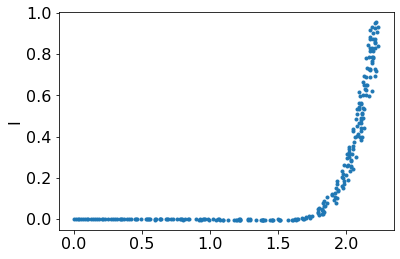

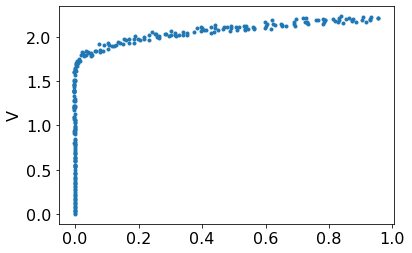

In [3]:
f = "./data/green2/green2.csv"

data = np.genfromtxt(f, delimiter=",") # 1st column is V, second is I
plt.ylabel("I")
plt.plot(data[:,0], data[:,1], ".")
plt.show()

plt.ylabel("V")
plt.plot(data[:,1], data[:,0], ".")
plt.show()

# Method 1: exponential curve fitting

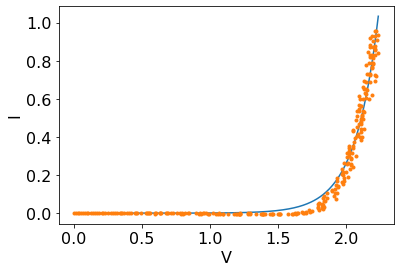

turn-on voltage: 1.8262500821438732 0.5461086977207841


In [4]:
def exp(x, A, c):
    return A*np.exp(x/c)

popt, pcov = curve_fit(exp, data[:,0], data[:,1], sigma = None)
perr = np.sqrt(np.diag(pcov))

uniform_V = np.linspace(0,max(data[:,0]),300)
plt.plot(uniform_V, exp(uniform_V, popt[0], popt[1]))
plt.ylabel("I")
plt.xlabel("V")
plt.plot(data[:,0], data[:,1], ".")
plt.show()

# Idea: determine where it starts turning on as 10%

min_I = 0.1*max(data[:,1])
min_V = popt[1]*np.log(np.abs(min_I/popt[0]))

# error by propagation
err_min_V = np.sqrt((np.log(np.abs(min_I/popt[0])) * perr[1])**2 # error from c
                     + (popt[1]/(min_I*popt[0]) * perr[0])**2 #error from A
                     + (popt[1]/min_I * 0)**2) # error from I (add!)

print("turn-on voltage:", min_V, err_min_V)

In [5]:
# Automated exponential curve fitting

def exp(x, A, c):
    return A*np.exp(x/c)

def exponential_v0(data_array):
    
    popt, pcov = curve_fit(exp, data_array[:,0], data_array[:,1], sigma = None)
    perr = np.sqrt(np.diag(pcov))

    uniform_V = np.linspace(0,max(data[:,0]),300)
    plt.plot(uniform_V, exp(uniform_V, popt[0], popt[1]))
    plt.ylabel("I")
    plt.xlabel("V")
    plt.plot(data[:,0], data[:,1], ".")
    plt.show()

    # Idea: determine where it starts turning on as 10%

    min_I = 0.1*max(data_array[:,1])
    min_V = popt[1]*np.log(np.abs(min_I/popt[0]))
    
    # error by propagation
    err_min_V = np.sqrt((np.log(np.abs(min_I/popt[0])) * perr[1])**2 # error from c
                     + (popt[1]/(min_I*popt[0]) * perr[0])**2 #error from A
                     + (popt[1]/min_I * 0)**2) # error from I (add?)
    print("turn-on voltage:", min_V, err_min_V)
    
    return(min_V, err_min_V)

processing LED: ./data/yellow
0
	 yellow_run3.csv


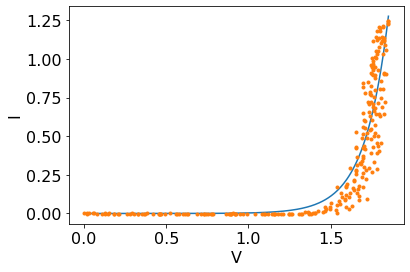

turn-on voltage: 1.515891453960425 0.7998075231476901
	 yellow.csv


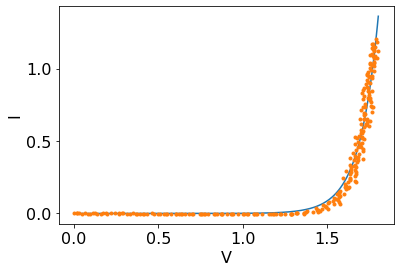

turn-on voltage: 1.536694100313931 0.42705845225202504
	 yellow_run2.csv


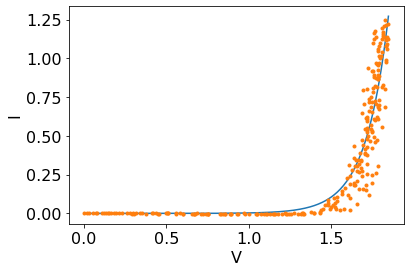

turn-on voltage: 1.526063213742522 0.6931048527316821
	 yellow_run4.csv


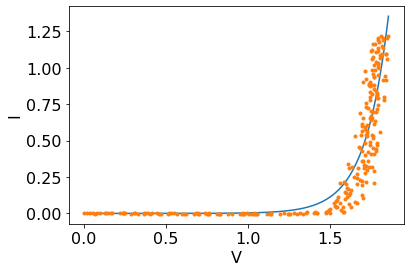

turn-on voltage: 1.5117776498989992 0.8134560575222397
processing LED: ./data/red
1
	 red_run4.csv


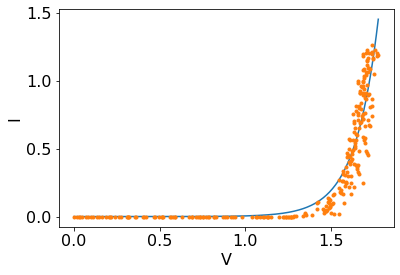

turn-on voltage: 1.4414199808046537 0.6325375446551201
	 red_run2.csv


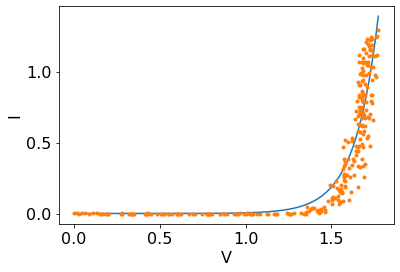

turn-on voltage: 1.4498584850173775 0.6994649306248941
	 red_run3.csv


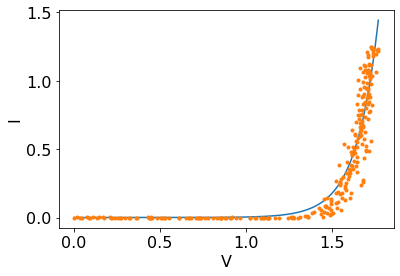

turn-on voltage: 1.4577931532648896 0.5944058988416745
	 red.csv


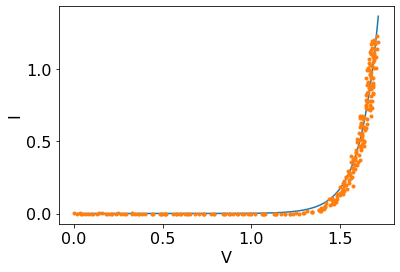

turn-on voltage: 1.4637101920860542 0.35936002512905024
processing LED: ./data/green2
2
	 green2_run2.csv


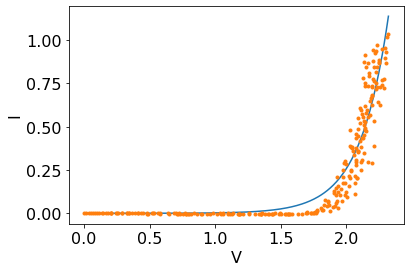

turn-on voltage: 1.8031795703353144 0.8546469370479033
	 green2_run3.csv


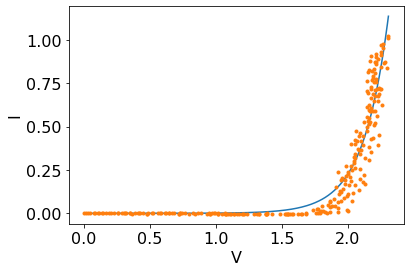

turn-on voltage: 1.8500228643723102 0.8995416903923185
	 green2_run4.csv


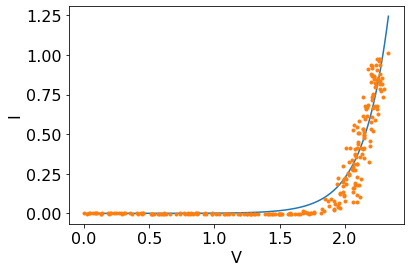

turn-on voltage: 1.8449568972797792 0.8727854896104564
	 green2.csv


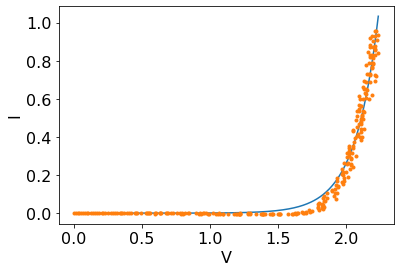

turn-on voltage: 1.8262500821438732 0.5461086977207841
processing LED: ./data/blue2
3
	 blue2_run2.csv


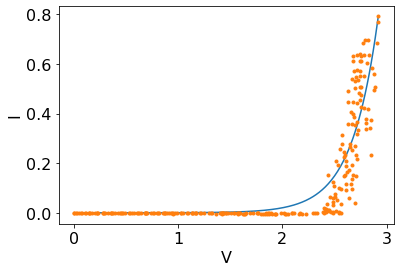

turn-on voltage: 2.342070956889816 2.074151826085337
	 blue2_run3.csv


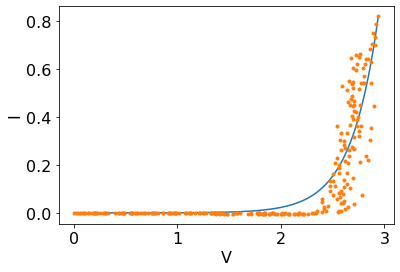

turn-on voltage: 2.3350939620266726 2.0292690024741082
	 blue2.csv


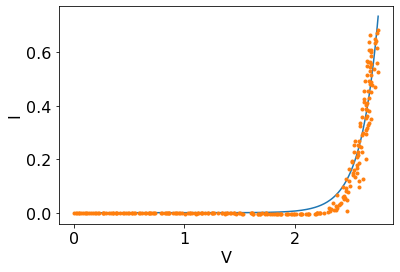

turn-on voltage: 2.377918212552777 1.4319878304292197
	 blue2_run4.csv


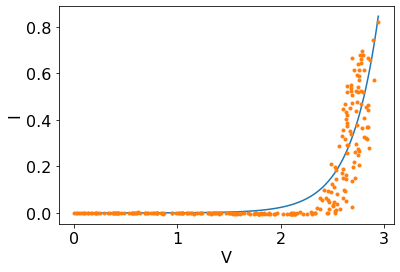

turn-on voltage: 2.3270786748034653 2.1980023864755696
processing LED: ./data/blue1
4
	 blue1_run2.csv


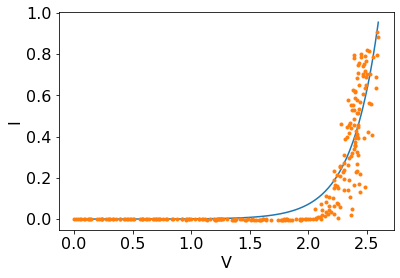

turn-on voltage: 2.052749619917654 1.5554674087472289
	 blue1_run3.csv


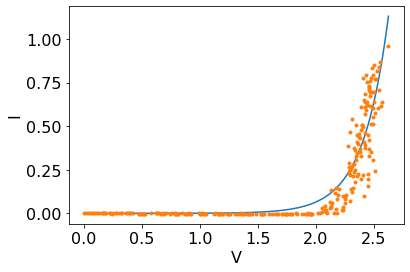

turn-on voltage: 2.086805854429205 1.3622256402372026
	 blue1_run4.csv


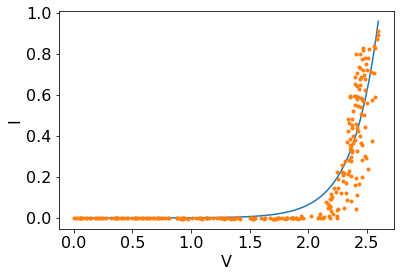

turn-on voltage: 2.0774226270393847 1.5658606740249026
	 blue1.csv


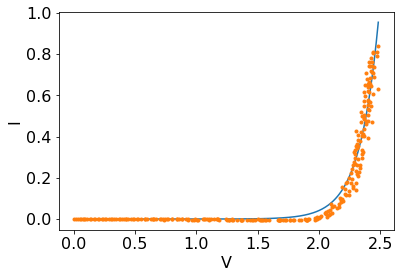

turn-on voltage: 2.109102566840094 0.8882512904084998
processing LED: ./data/orange
5
	 orange_run3.csv


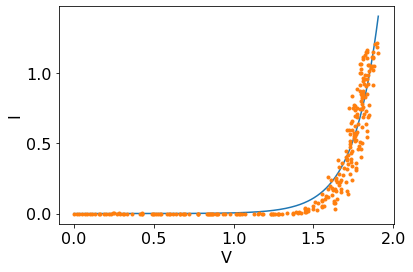

turn-on voltage: 1.515683424165286 0.5993628198908101
	 orange_run2.csv


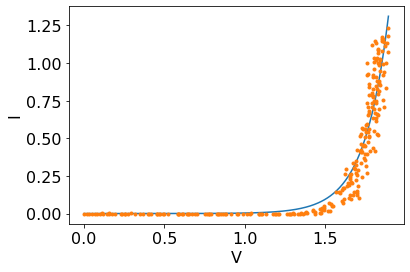

turn-on voltage: 1.5401168853060623 0.6124695619378947
	 orange.csv


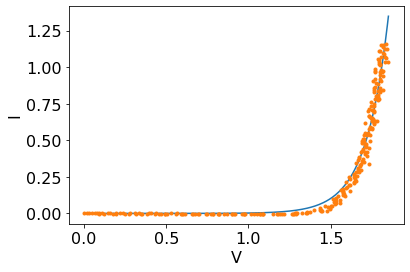

turn-on voltage: 1.5167220483150734 0.3806364575235029
	 orange_run4.csv


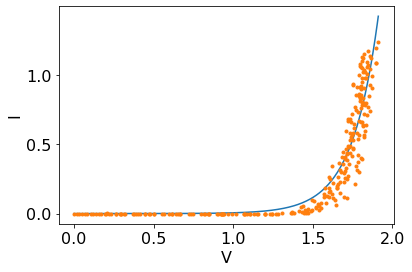

turn-on voltage: 1.5116098398541762 0.6638596865131284
processing LED: ./data/green1
6
	 green1_run4.csv


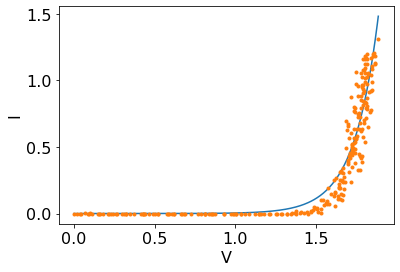

turn-on voltage: 1.5217432850020578 0.594179447650959
	 green1_run2.csv


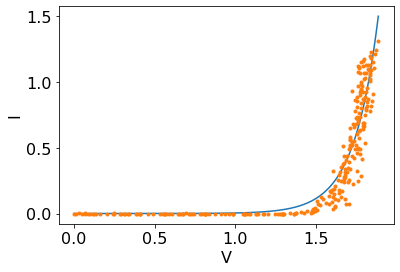

turn-on voltage: 1.5201559204412658 0.6200005556449167
	 green1.csv


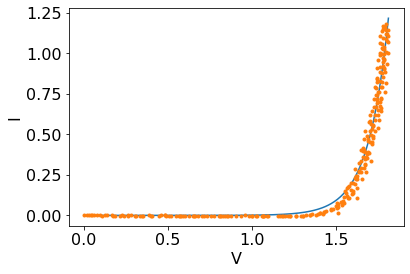

turn-on voltage: 1.5290599112501915 0.4081008422704864
	 green1_run3.csv


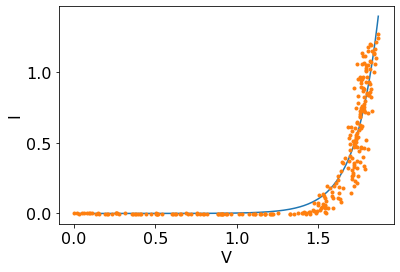

turn-on voltage: 1.5297517287890765 0.6491546544947915
processing LED: ./data/.ipynb_checkpoints
7


In [13]:
## Loop through datafiles with this method

LEDs = []
V0_exp = np.zeros((7, 4))
V0_exp_err = np.zeros(7)

n = 0
for i in os.listdir("./data/"):
    f = os.path.join("./data/", i)
    
    if not (os.path.isfile(f)): # loop through the subdirectory for each LED
        print("processing LED:", f)
        print(n)
        LEDs.append(i.split(".")[0])
        led_path = os.path.join("./data/", f)
        for i, file in enumerate(os.listdir(f)): # loop through the datafiles for one LED
            
            print("\t", file)
            
            data = np.genfromtxt(os.path.join(f, file), delimiter=",")
            min_V, err_min_V = exponential_v0(data)
            
            # add it to the list
            V0_exp[n, i] = min_V
            V0_exp_err[n] += err_min_V
        
        n+=1

In [26]:
n_runs = 4
V0_avg = np.mean(V0_exp, axis=1) # Get the average turn-on voltage between runs
V0_uncert = np.sqrt((V0_exp_err/n_runs)**2 + np.std(V0_exp, axis=1)) # combine stat and syst uncertainty
d = np.concatenate((np.array(V0_avg)[:,np.newaxis], 
                np.array(V0_uncert)[:,np.newaxis]), axis=1) # put everything into one array

print(LEDs[:-1])

['yellow', 'red', 'green2', 'blue2', 'blue1', 'orange', 'green1']


In [31]:
# store data for exponential estimates in a dataframe (to keep the led names)
df_exp = pd.DataFrame(d, index = LEDs[:-1], columns = ["V0", "V0_uncert"])
print(df_exp)

# save to file
df_exp.to_csv("V_exponential.csv")

              V0  V0_uncert
yellow  1.522607   0.690384
red     1.453195   0.578736
green2  1.831102   0.804780
blue2   2.345540   1.938372
blue1   2.081520   1.350454
orange  1.521033   0.573909
green1  1.525178   0.571608


In [32]:
df_exp.loc["yellow"] # example of how to get data for an LED

V0           1.522607
V0_uncert    0.690384
Name: yellow, dtype: float64

# Method 2: piecewise linear

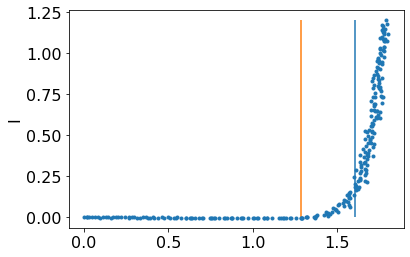

In [183]:
f = "./data/yellow/yellow1.csv"

data = np.genfromtxt(f, delimiter=",") # 1st column is V, second is I
plt.ylabel("I")
plt.plot(data[:,0], data[:,1], ".")
size_data = len(data[:,0])

plt.vlines(data[:,0][int(size_data/3)], 0, max(data[:,1]), "C1")
plt.vlines(data[:,0][-int(size_data/2)], 0, max(data[:,1]), "C0")
plt.show()

In [188]:
# linear fits
size_data = len(data[:,0])

(a0, b0), cov0 = np.polyfit(data[:,0][:int(size_data/3)], data[:,1][:int(size_data/3)], 1, full = False, cov = True)
(a1, b1), cov1 = np.polyfit(data[:,0][-int(size_data/3):], data[:,1][-int(size_data/3):], 1, full = False, cov = True)

(-0.1, 1.302167701251355)

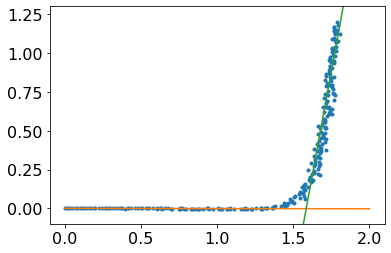

In [192]:
x = np.linspace(0,2,100)
plt.plot(data[:,0], data[:,1], ".")
plt.plot(x, a0*x+b0)
plt.plot(x, a1*x+b1)

plt.ylim(-0.1, max(data[:,1]+0.1))

In [ ]:
# Optimizing the breakpoint of the piecewise linear
